In [1]:
%pylab inline
import numpy as np
from scipy import stats
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.random.randn(100)

In [3]:
with pm.Model() as model: 
    mu = pm.Normal('mu', mu=0, sd=1, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=data)

In [4]:
means, sds, elbos = pm.variational.advi(model=model, n=20000, accurate_elbo=True)

Average ELBO = -144.42: 100%|██████████| 20000/20000 [01:41<00:00, 197.93it/s]
Finished [100%]: Average ELBO = -144.43


In [5]:
with model:
    step = pm.NUTS()
    trace = pm.sample(1000, step)

100%|██████████| 1000/1000 [00:03<00:00, 273.24it/s]


In [6]:
print(trace['mu'].mean())
print(trace['sd_log_'].mean())
print(trace['mu'].std())
print(trace['sd_log_'].std())

-0.17169500302
-0.00961214148597
0.101946369818
0.0678575947719


/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


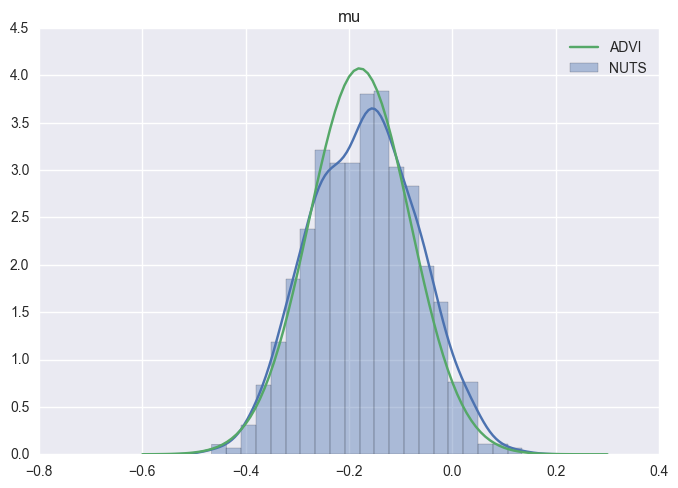

In [7]:
ax = sns.distplot(trace['mu'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['mu'], sds['mu']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('mu')
ax.legend(loc=0)

/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


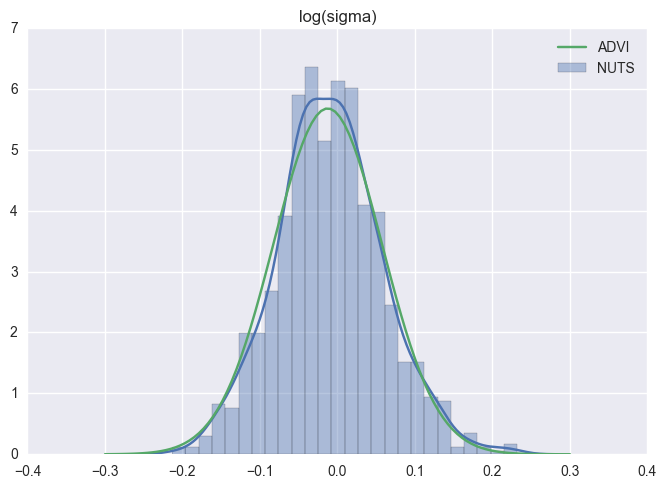

In [8]:
ax = sns.distplot(trace['sd_log_'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['sd_log_'], sds['sd_log_']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('log(sigma)')
ax.legend(loc=0)

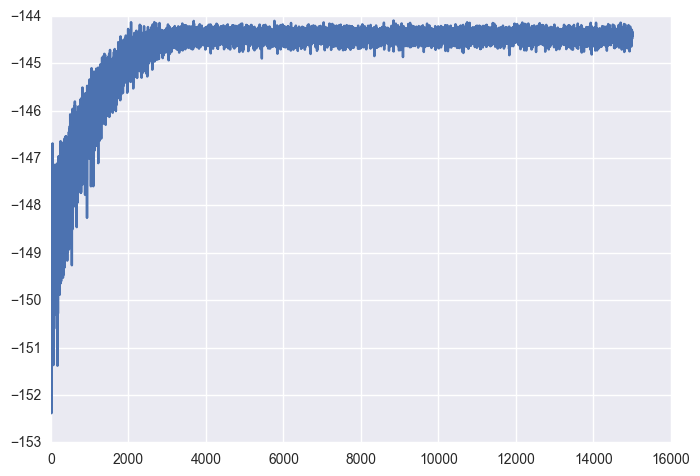

In [9]:
import matplotlib.pyplot as plt
plt.plot(elbos[5000:])